In [1]:
import nepc
import plotter
import matplotlib.pyplot as plt

In [2]:
cnx, cursor = nepc.connect(local=False)

In [3]:
cursor.execute("SELECT model_id, name FROM models")
cursor.fetchall()

[(1, 'angus'), (2, 'bPCM_N')]

In [4]:
angus = nepc.model(cursor,"angus")

In [5]:
angus

[{'cs_id': 1,
  'specie': 'N2',
  'process': 'excitation',
  'units_e': 1.0,
  'units_sigma': 1e-20,
  'ref': 'itikawa2006',
  'lhsA': 'N2(X1Sigmag+)',
  'lhsB': None,
  'rhsA': 'N2(ap1Sigmau-)',
  'rhsB': None,
  'wavelength': None,
  'lhs_v': None,
  'rhs_v': None,
  'lhs_j': None,
  'rhs_j': None,
  'background': 'a weighted average of the experimental cross sections has been taken with a polynomial least square fit to the energy dependence of the individual set of the cross sections. Thus the estimated uncertainty indicates the degree of the concurrence of the individual experimental results',
  'lpu': 0.3,
  'upu': 0.3,
  'e': [9.4,
   9.5,
   10.0,
   10.5,
   11.0,
   11.5,
   12.0,
   12.5,
   13.0,
   13.5,
   14.0,
   14.5,
   15.0,
   15.5,
   16.0,
   16.5,
   17.0,
   17.5,
   18.0,
   18.5,
   19.0,
   20.0,
   25.0,
   30.0,
   35.0,
   40.0,
   45.0,
   50.0],
  'sigma': [0.006,
   0.011,
   0.031,
   0.042,
   0.051,
   0.059,
   0.069,
   0.08,
   0.091,
   0.101,
   

In [6]:
cursor.execute("SELECT * FROM processes")
processes = cursor.fetchall()
print(processes)

[(1, 'elastic', 'Elastic electron scattering', 1, 1, 1, 1, 0, 0, 0, 0, 0, 0), (2, 'excitation', '"Excitation of atoms (electronic), inelastic electron scattering"', 1, 1, 1, 1, 0, 0, 0, 0, 0, 0), (3, 'excitation_v', '"Excitation of atoms (electronic + vibrational), inelastic electron scattering"', 1, 1, 1, 1, 0, 0, 1, 1, 0, 0), (4, 'excitation_j', '"Excitation of atoms (electronic + rotational), inelastic electron scattering"', 1, 1, 1, 1, 0, 0, 0, 0, 1, 1), (5, 'excitation_vj', '"Excitation of atoms (electronic + vibrational + rotational), inelastic electron scattering"', 1, 1, 1, 1, 0, 0, 1, 1, 1, 1), (6, 's_deexcitation', 'Spontaneous de-excitation', 1, 1, 0, 0, 0, 1, 0, 0, 0, 0), (7, 's_deexcitation_v', 'Spontaneous de-excitation (vibrational)', 1, 1, 0, 0, 0, 1, 1, 1, 0, 0), (8, 's_deexcitation_j', 'Spontaneous de-excitation (rotational)', 1, 1, 0, 0, 0, 1, 0, 0, 1, 1), (9, 's_deexcitation_vj', 'Spontaneous de-excitation (vibrational and rotational)', 1, 1, 0, 0, 0, 1, 1, 1, 1, 1)

In [7]:
cursor.execute("SELECT * FROM states")
states = cursor.fetchall()
print(states)

[(1, 1, 'N', 'N', '{"{\\"order\\": [\\"2s\\", \\"2p\\", \\"CoreTerm\\", \\"3s\\", \\"3p\\", \\"3d\\", \\"4s\\"]}": {"occupations": {"2p": "", "2s": "", "3d": "", "3p": "", "3s": "", "4s": "", "CoreTerm": ""}}}'), (2, 1, 'N(2s22p3 4So)', 'N($2s^22p^3 {}^4S^o$)', '{"{\\"order\\": [\\"2s\\", \\"2p\\", \\"CoreTerm\\", \\"3s\\", \\"3p\\", \\"3d\\", \\"4s\\"]}": {"occupations": {"2p": "3", "2s": "2", "3d": "0", "3p": "0", "3s": "0", "4s": "0", "CoreTerm": ""}}}'), (3, 1, 'N(2s22p3 2Do)', 'N($2s^22p^3 {}^2D^o$)', '{"{\\"order\\": [\\"2s\\", \\"2p\\", \\"CoreTerm\\", \\"3s\\", \\"3p\\", \\"3d\\", \\"4s\\"]}": {"occupations": {"2p": "3", "2s": "2", "3d": "0", "3p": "0", "3s": "0", "4s": "0", "CoreTerm": ""}}}'), (4, 1, 'N(2s22p3 2Po)', 'N($2s^22p^3 {}^2P^o$)', '{"{\\"order\\": [\\"2s\\", \\"2p\\", \\"CoreTerm\\", \\"3s\\", \\"3p\\", \\"3d\\", \\"4s\\"]}": {"occupations": {"2p": "3", "2s": "2", "3d": "0", "3p": "0", "3s": "0", "4s": "0", "CoreTerm": ""}}}'), (5, 1, 'N(2s22p2(3P)3s 4P)', 'N($2s^2

In [8]:
cs_id=1
cursor.execute("SELECT A.`cs_id` , "
               "B.`name` , "
               "C.`name` , "
               "A.`units_e`, A.`units_sigma`, A.`ref`, "
               "D.`name`, E.`name`, "
               "F.`name`, G.`name`, "
               "A.`wavelength`, A.`lhs_v`, A.`rhs_v`, A.`lhs_j`, A.`rhs_j`, "
               "A.`background`, A.`lpu`, A.`upu` "
               "FROM `cs` AS A "
               "LEFT JOIN `species` AS B "
               "ON B.`id` = A.`specie_id` "
               "LEFT JOIN `processes` AS C "
               "ON C.`id` = A.`process_id` "
               "LEFT JOIN `states` AS D "
               "ON D.`id` = A.`lhsA_id` "
               "LEFT JOIN `states` AS E "
               "ON E.`id` = A.`lhsB_id` "
               "LEFT JOIN `states` AS F "
               "ON F.`id` = A.`rhsA_id` "
               "LEFT JOIN `states` AS G "
               "ON G.`id` = A.`rhsB_id` "
               "WHERE A.`cs_id` = " + str(cs_id))
cs_species = cursor.fetchall()[0]
print(cs_species)

(1, 'N2', 'excitation', 1.0, 1e-20, 'itikawa2006', 'N2(X1Sigmag+)', None, 'N2(ap1Sigmau-)', None, None, None, None, None, None, 'a weighted average of the experimental cross sections has been taken with a polynomial least square fit to the energy dependence of the individual set of the cross sections. Thus the estimated uncertainty indicates the degree of the concurrence of the individual experimental results', 0.3, 0.3)


In [9]:
type(angus[0]["e"])

list

In [10]:
from collections import defaultdict
a = [{'un': 'a', 'id': "cd"}, 
     {'un': 'b', 'id': "cd"},
     {'un': 'b', 'id': "cd"}, 
     {'un': 'c', 'id': "vd"}, 
     {'un': 'c', 'id': "a"}, 
     {'un': 'c', 'id': "vd"}, 
     {'un': 'a', 'id': "cm"}]

items = defaultdict(list)
for row in a:
    items[row['un']].append(row['id'])  #make a list of 'id' values for each 'un' key

print('items = ', items)

print('\n')
    
print("items['a'] =", items['a'])

#for key in items.keys():
#    if len(items[key]) > 1:  #if there is more than one 'id'
#        newValue = somefunc(items[key])  #decided which of the list items to keep
#        items[key] = newValue  #put that new value back into the dictionary

items =  defaultdict(<class 'list'>, {'a': ['cd', 'cm'], 'b': ['cd', 'cd'], 'c': ['vd', 'a', 'vd']})


items['a'] = ['cd', 'cm']


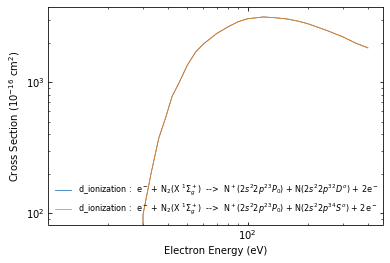

In [11]:
fig, ax = plt.subplots(1, 1)
plotter.plot_nepc_model(ax, angus, 1E-24, '10$^{-16}$ cm$^2$',
                        'd_ionization',
                        plot_param_dict = {'linewidth':.8}, 
                        #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
                        ylog=True, xlog=True) 

In [12]:
cnx.close()